In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import os
os.environ["OMP_NUM_THREADS"] = "1"

In [5]:
df=pd.read_csv('Mall_Customers.csv')


In [6]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [7]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [8]:
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [10]:
 df.rename (columns={'Annual Income (k$)': 'Annualincome','Spending Score (1-100)':'Spendingscore'},inplace=True)
df.head()

,CustomerID,Gender,Age,Annualincome,Spendingscore
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


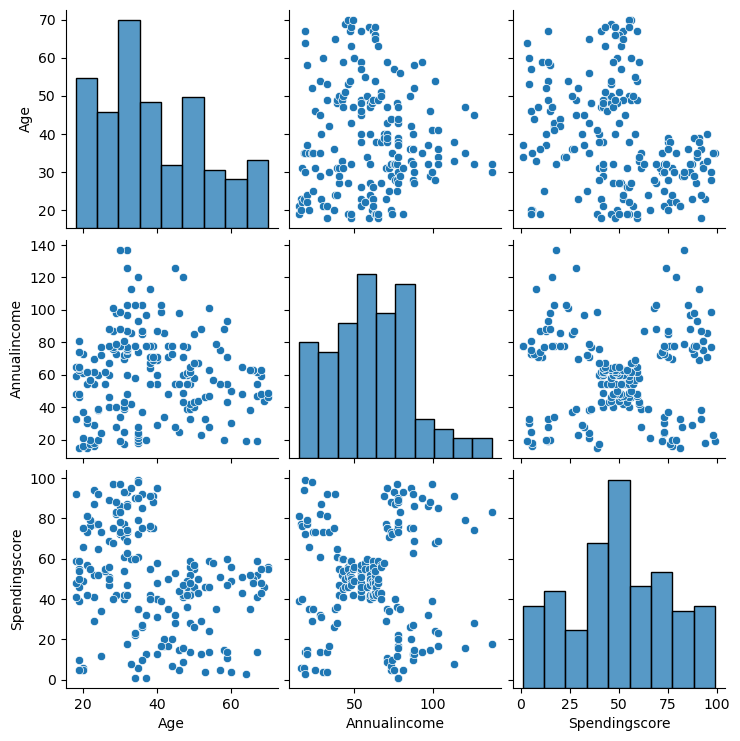

In [11]:
sn.pairplot(df[['Age','Annualincome','Spendingscore']])

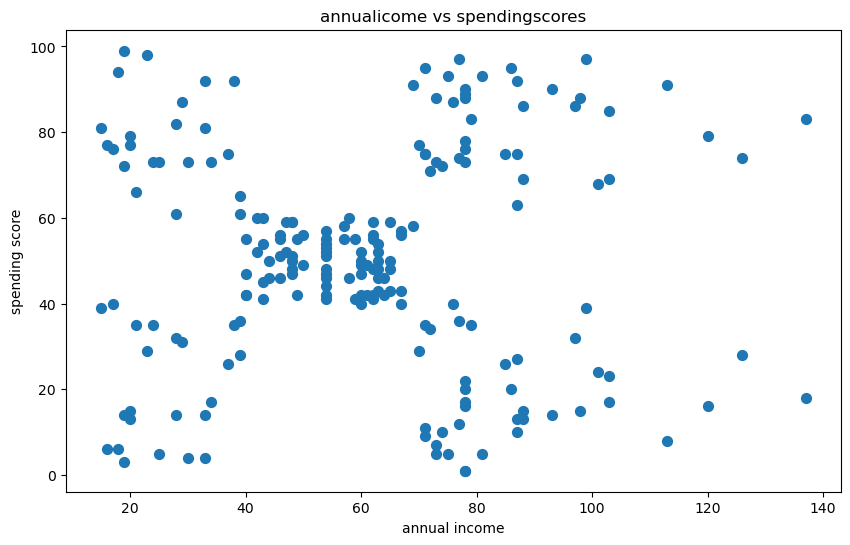

In [12]:
plt.figure(figsize=(10,6))
plt.scatter(df['Annualincome'],df['Spendingscore'],s=50)
plt.xlabel('annual income')
plt.ylabel('spending score')
plt.title('annualicome vs spendingscores')
plt.show()

In [13]:
from sklearn.cluster import KMeans

In [14]:
x=df[['Annualincome','Spendingscore']]
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

    


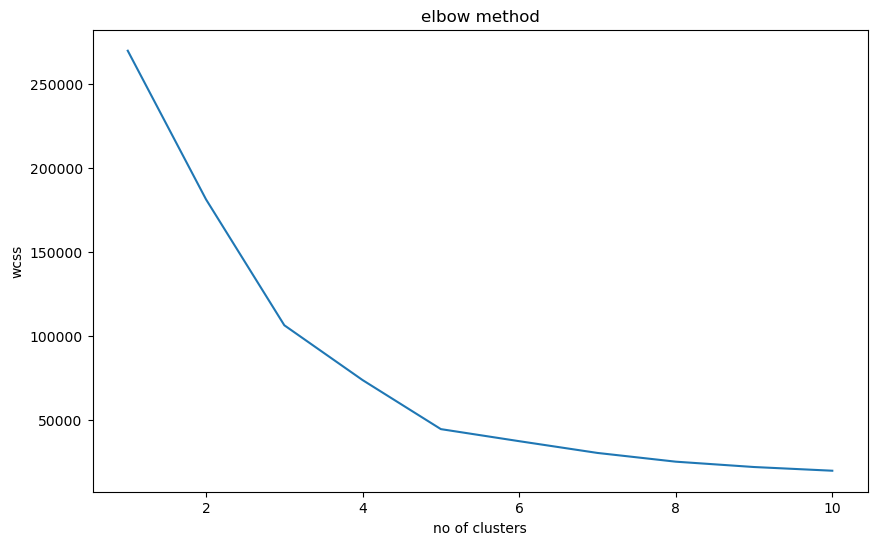

In [15]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss)
plt.xlabel('no of clusters')
plt.ylabel('wcss')
plt.title('elbow method')
plt.show()

In [16]:
kmeans=KMeans(n_clusters= 5,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeans=kmeans.fit_predict(x)

In [17]:
df['CLuster']=y_kmeans

In [18]:
df.head()

,CustomerID,Gender,Age,Annualincome,Spendingscore,CLuster
0,1,Male,19,15,39,3
1,2,Male,21,15,81,4
2,3,Female,20,16,6,3
3,4,Female,23,16,77,4
4,5,Female,31,17,40,3


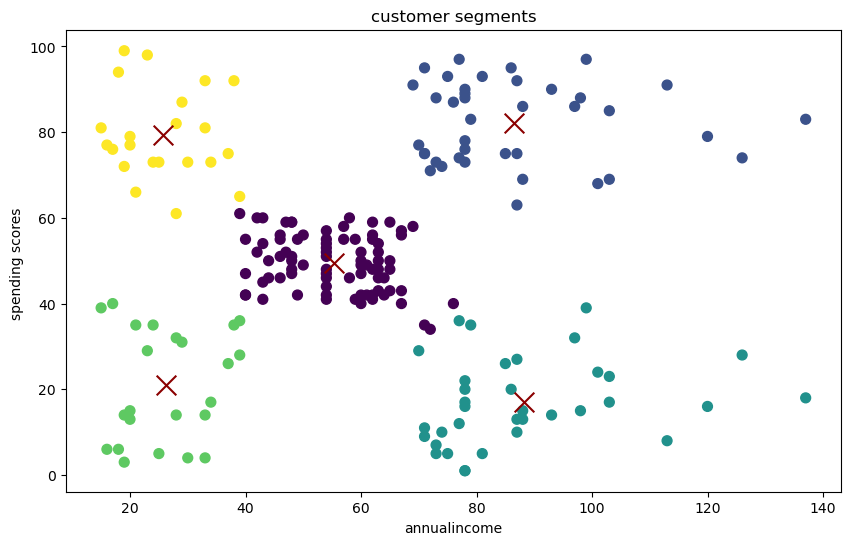

In [19]:
plt.figure(figsize=(10,6))
plt.scatter(x.iloc[:,0],x.iloc[:,1],c=y_kmeans,s=50,cmap='viridis')
centers=kmeans.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='darkred',s=200,alpha=1,marker='x')
plt.xlabel('annualincome')
plt.ylabel('spending scores ')
plt.title('customer segments')
plt.show()

In [41]:
x1=df[['Age','Spendingscore']]
wcss1=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init="k-means++",max_iter=300,n_init=10,random_state=0)
    kmeans.fit(x1)
    wcss1.append(kmeans.inertia_)


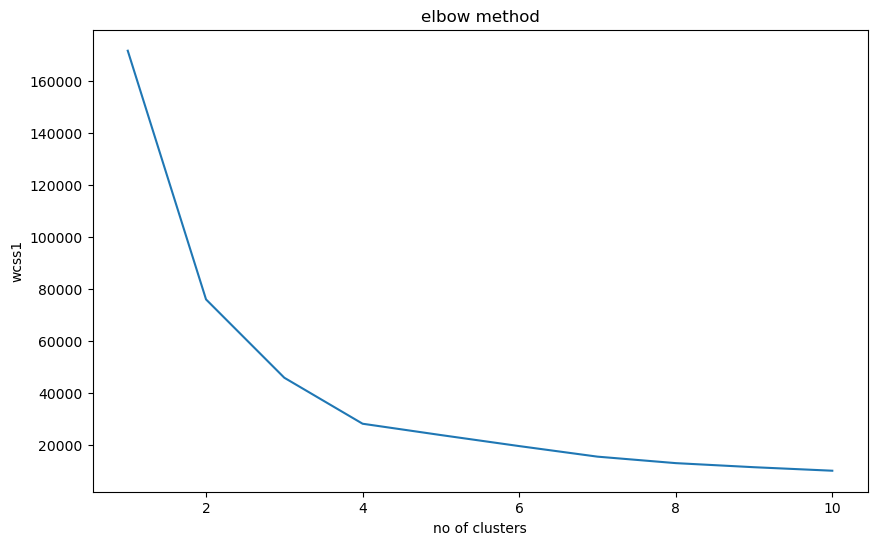

In [43]:
plt.figure(figsize=(10,6))
plt.plot(range(1,11),wcss1)
plt.xlabel('no of clusters')
plt.ylabel('wcss1')
plt.title('elbow method')
plt.show()

In [45]:
kmeansage=KMeans(n_clusters= 4,init='k-means++',max_iter=300,n_init=10,random_state=0)
y_kmeansage=kmeansage.fit_predict(x1)

In [47]:
df['cluster1']=y_kmeansage

In [49]:
df.head()

,CustomerID,Gender,Age,Annualincome,Spendingscore,CLuster,cluster1
0,1,Male,19,15,39,3,3
1,2,Male,21,15,81,4,1
2,3,Female,20,16,6,3,2
3,4,Female,23,16,77,4,1
4,5,Female,31,17,40,3,3


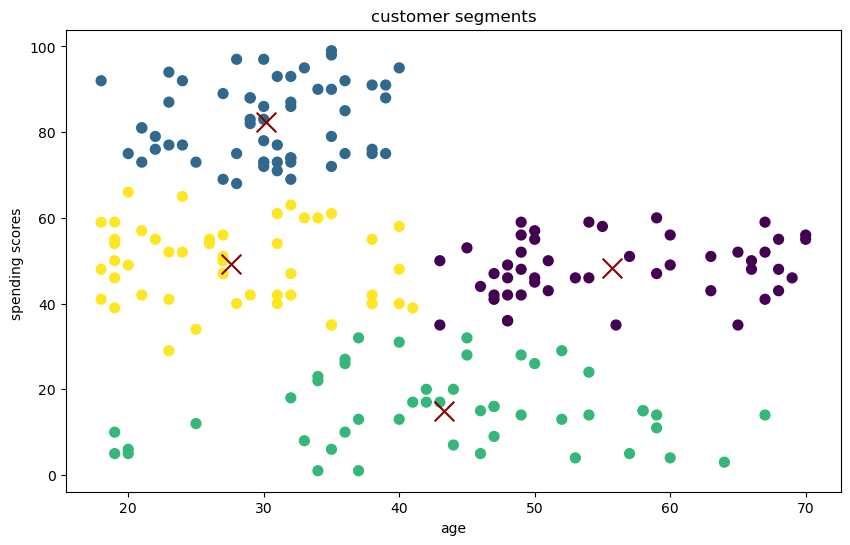

In [51]:
plt.figure(figsize=(10,6))
plt.scatter(x1.iloc[:,0],x1.iloc[:,1],c=y_kmeansage,s=50,cmap='viridis')
centers=kmeansage.cluster_centers_
plt.scatter(centers[:,0],centers[:,1],c='darkred',s=200,alpha=1,marker='x')
plt.xlabel('age')
plt.ylabel('spending scores ')
plt.title('customer segments')
plt.show()